Physic Lecture Series Exercises : Dynamical Systems

To properly interact with the plots, especially those from exercise 03 you would have to copy the code and start it in a seperate file, since Jupyter Notebooks only show 2d images of plots instead of opening the seperate matplotlib plotting window.

Exercise 01 :
    The parameter d is a constant in the formula which describes the dynamics of the pendulum. Said parameter is multiplied with the total energy of the system. Hence if d is smaller than one, the total energy of the system decreases with passing time, this in return means that the pendulum is progressivly getting less energetic and will eventually stop moving once enought time has expired. Thus all starting points end up in the same position given an infinite ammount of time which can also be confirmed by calculating the Jacobian matrix. If d is equal to one the system is conservative, this means no total energy is lost and forces such as friction are not considered in the formula. The total energy of the systems remains constant meaning, that the pendulum by itself will never stop oscillating.

Exercise 02 : 
    Sadly I do not posses the mathematical knowlegde to calculate the eigenvalues and the Jacobian matrix. Instead I wrote a script which caluclates and plots the developement of the System. The initial condidions can be changed throught the 'start' variables. I went ahead and plotted two different start values and their trajectories next to each other, furthermore I added heatmaps with which I tried to identify fixpoints under the assumption that those points would again and again be approached by the system. Thus appearing significantly more often than others. This vague analysis lead me to believe, that the fixpoint at x=0.310 and y= 0.205, which is represented through the bright dot on the heatmap is instable. I assume, that the system always gets close to said fixpoint but does not reach it precisely. This small difference is enought to make it repeat another cycle until it approaches the fixpoint ones more.

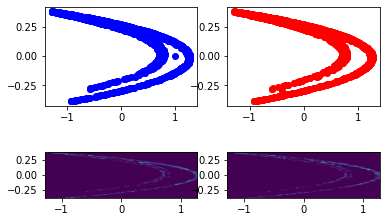

In [2]:
import matplotlib.pyplot as plt
import numpy  as  np

def calctrajectory(start, lim):
    x_n1 = 1 - 1.4 * (start[0]**2) + start[1]
    y_n1 = 0.3 * start[0]

    xtrajectory = [x_n1]
    ytrajectory = [y_n1]

    for i in range(lim):
        xtrajectory.append(1 - 1.4 * (xtrajectory[i]**2) + ytrajectory[i])
        ytrajectory.append(0.3 * xtrajectory[i])

    trajectory = [xtrajectory, ytrajectory]
    return(trajectory)

    
start = [0,0]
start2 = [-1, 0]
trajectory1 = calctrajectory(start, 1000)
trajectory2 = calctrajectory(start2, 1000)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.scatter(trajectory1[0],  trajectory1[1], color="blue")

ax2.scatter(trajectory2[0],  trajectory2[1],  color="red")

heatmap, xedges, yedges = np.histogram2d(trajectory1[0],  trajectory1[1], bins=60)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax3.imshow(heatmap.T, extent=extent, origin='lower')

heatmap, xedges, yedges = np.histogram2d(trajectory2[0],  trajectory2[1], bins=60)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax4.imshow(heatmap.T, extent=extent, origin='lower')

#print(xtrajectory1[999990:], ytrajectory1[999990:])

plt.show()

Exercise 03 :
    For this exercise I was only able to plot the results, sadly I did not have enough time to fully understand the animation tools provided by matplotlib.

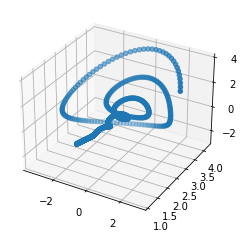

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def odes(x, t):
    # constants
    u = 0.119 # change this variable for different plots as requested by the task description
    v = 0.1
    g = 0.9
    
    # assign each ODe to a vector Element
    X = x[0]
    Y = x[1]
    Z = x[2]

    # define each ODE
    dXdt = u*X - Y*Z
    dYdt = -v*Y + X*Z
    dZdt = g - Z + X*Y

    return(dXdt, dYdt, dZdt)

fig = plt.figure()
ax = plt.axes(projection='3d')

# inital condition
x0 = [3,3,3]

#print(odes(x0, 0))

# declare a time vector using numpy
t = np.linspace(0,15,1000)

# solve the ODES with the odeint function of the scypy library
x = odeint(odes,x0,t)

X = x[:,0]
Y = x[:,1]
Z = x[:,2]

ax.scatter(X, Y, Z)

plt.show()